In [316]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input,Flatten
from keras.layers.normalization import BatchNormalization
from sklearn import preprocessing 
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import math

In [317]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.drop_duplicates() #drop duplicate rows if any

#a less sophisticated outlier removal
# outliers = [30, 88, 462, 631, 1322]
# for i in outliers:
#     data.drop(data.index[i],inplace=True)

data_test.drop_duplicates()
train_id = data['Id']
test_id = data_test['Id']
data.drop(['Id'], axis = 1, inplace=True)
data_test.drop(['Id'], axis = 1, inplace=True)
data.drop(['Utilities'], axis = 1, inplace=True)
data_test.drop(['Utilities'], axis = 1, inplace=True)
print(data.shape)
print(data_test.shape)
l1 = data.columns.tolist()
l2 = data_test.columns.tolist()
diff = [x for x in l1 if x not in l2]
# print(diff)

(1460, 79)
(1459, 78)


In [318]:
#categorical
headers_cat = ["MSSubClass","MSZoning",
"LotShape","LandContour","LotConfig",
"Neighborhood","Condition1",
"BldgType","HouseStyle","RoofStyle",
"Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond",
"Foundation","BsmtQual","BsmtCond",
"BsmtExposure","BsmtFinType1","BsmtFinType2",
"HeatingQC","KitchenQual",
"FireplaceQu","GarageType","GarageFinish","GarageQual",
"Fence","MoSold", "SaleType", "SaleCondition"]

#continuous
headers_con = ["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1",
"BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
"1stFlrSF","2ndFlrSF",
"GrLivArea","FullBath","HalfBath","BedroomAbvGr",
"TotRmsAbvGrd","Fireplaces","GarageYrBlt",
"GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","YrSold"]

maybe = ['ExterQual',"ExterCond","BsmtQual","BsmtCond","BsmtExposure",
"BsmtFinType1", "BsmtFinType2","HeatingQC", "KitchenQual", "Functional",
"FireplaceQu","GarageFinish","GarageQual","GarageCond", 
"PavedDrive","PoolQC","Fence"]

print(len(headers_cat))
print(len(headers_con))

31
26


In [319]:
has_nan = []
for header in headers_cat:
    if data[header].isna().any() or data_test[header].isna().any():
        has_nan.append(header)

for header in headers_con:
    if data[header].isna().any() or data_test[header].isna().any():
        has_nan.append(header)

print(has_nan)
print(len(has_nan))
        
#fill nans
data["Alley"].fillna('NA', inplace=True)
data_test["Alley"].fillna('NA', inplace=True)

data["MasVnrType"].fillna('None', inplace=True)
data_test["MasVnrType"].fillna('None', inplace=True)

data["BsmtQual"].fillna('NA', inplace=True)
data_test["BsmtQual"].fillna('NA', inplace=True)

data["BsmtCond"].fillna('NA', inplace=True)
data_test["BsmtCond"].fillna('NA', inplace=True)

data["BsmtExposure"].fillna('NA', inplace=True)
data_test["BsmtExposure"].fillna('NA', inplace=True)

data["BsmtFinType1"].fillna('NA', inplace=True)
data_test["BsmtFinType1"].fillna('NA', inplace=True)

data["BsmtFinType2"].fillna('NA', inplace=True)
data_test["BsmtFinType2"].fillna('NA', inplace=True)

data["Electrical"].fillna('SBrkr', inplace=True)
data_test["Electrical"].fillna('SBrkr', inplace=True)

data["FireplaceQu"].fillna('NA', inplace=True)
data_test["FireplaceQu"].fillna('NA', inplace=True)

data["GarageType"].fillna('NA', inplace=True)
data_test["GarageType"].fillna('NA', inplace=True)

data["GarageFinish"].fillna('NA', inplace=True)
data_test["GarageFinish"].fillna('NA', inplace=True)

data["GarageQual"].fillna('NA', inplace=True)
data_test["GarageQual"].fillna('NA', inplace=True)

data["GarageCond"].fillna('NA', inplace=True)
data_test["GarageCond"].fillna('NA', inplace=True)

data["PoolQC"].fillna('NA', inplace=True)
data_test["PoolQC"].fillna('NA', inplace=True)

data["Fence"].fillna('NA', inplace=True)
data_test["Fence"].fillna('NA', inplace=True)

data["MiscFeature"].fillna('NA', inplace=True)
data_test["MiscFeature"].fillna('NA', inplace=True)

# def tmp(x):
#     x.fillna(x.median())
#     print(data_test.groupby('Neighborhood')['LotFrontage'])
#     data_test.groupby('Neighborhood')['LotFrontage'][x.name].fillna(x.median())
# data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: )
# data_test['LotFrontage'] = data_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: )
data["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace=True)
data_test["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace=True)

data["MasVnrArea"].fillna(0, inplace=True)
data_test["MasVnrArea"].fillna(0, inplace=True)

# data['MSZoning'] = data.groupby(['MSSubClass'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# data_test['MSZoning'] = data_test.groupby(['MSSubClass'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
data["LotFrontage"].fillna("RL", inplace=True)
data_test["LotFrontage"].fillna("RL", inplace=True)

data["Exterior1st"].fillna("Other", inplace=True)
data_test["Exterior1st"].fillna("Other", inplace=True)

data["Exterior2nd"].fillna("Other", inplace=True)
data_test["Exterior2nd"].fillna("Other", inplace=True)

data["KitchenQual"].fillna("TA", inplace=True)
data_test["KitchenQual"].fillna("TA", inplace=True)

data["Functional"].fillna("Typ", inplace=True)
data_test["Functional"].fillna("Typ", inplace=True)

data["SaleType"].fillna("WD", inplace=True)
data_test["SaleType"].fillna("WD", inplace=True)

data["BsmtFinSF1"].fillna(0, inplace=True)
data_test["BsmtFinSF1"].fillna(0, inplace=True)

data["BsmtFinSF2"].fillna(0, inplace=True)
data_test["BsmtFinSF2"].fillna(0, inplace=True)

data["BsmtUnfSF"].fillna(0, inplace=True)
data_test["BsmtUnfSF"].fillna(0, inplace=True)

data["TotalBsmtSF"].fillna(0, inplace=True)
data_test["TotalBsmtSF"].fillna(0, inplace=True)

data["BsmtFullBath"].fillna(0, inplace=True)
data_test["BsmtFullBath"].fillna(0, inplace=True)

data["BsmtHalfBath"].fillna(0, inplace=True)
data_test["BsmtHalfBath"].fillna(0, inplace=True)

data["GarageCars"].fillna(0, inplace=True)
data_test["GarageCars"].fillna(0, inplace=True)

data["GarageArea"].fillna(0, inplace=True)
data_test["GarageArea"].fillna(0, inplace=True)

data["GarageYrBlt"].fillna(data["YearBuilt"], inplace=True)
data_test["GarageYrBlt"].fillna(data_test["YearBuilt"], inplace=True)
    
#remove outlieres with IQR 
q25 = data["GrLivArea"].quantile(0.25)
q75 = data["GrLivArea"].quantile(0.75)
IQR = q75 - q25
print("25th " + str(q25))
print("75th " + str(q75))
print(q25 - 4.2 * IQR)
print(q75 + 4.2 * IQR)
data = data.query('(@q25 - 4.2 * @IQR) <= GrLivArea <= (@q75 + 4.2 * @IQR)')

['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Fence', 'SaleType', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'GarageArea']
25
25th 1129.5
75th 1776.75
-1588.9500000000003
4495.200000000001


LotFrontage
0.0% is zero


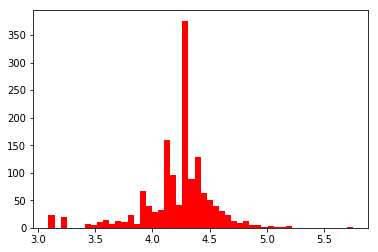

LotArea
0.0% is zero


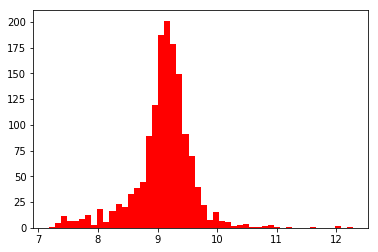

OverallQual
0.0% is zero


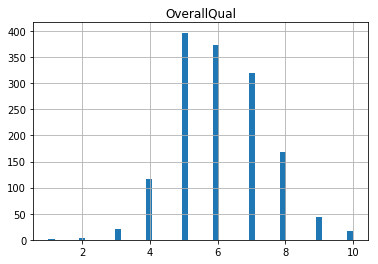

OverallCond
0.0% is zero


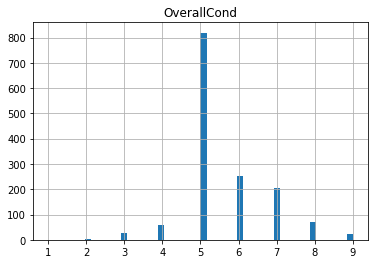

YearBuilt
0.0% is zero


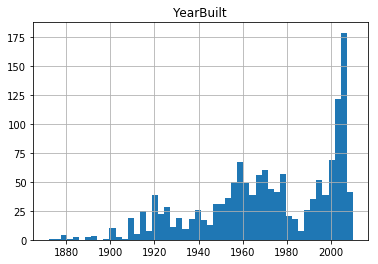

YearRemodAdd
0.0% is zero


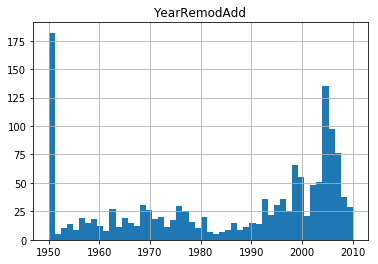

MasVnrArea
59.60219478737997% is zero


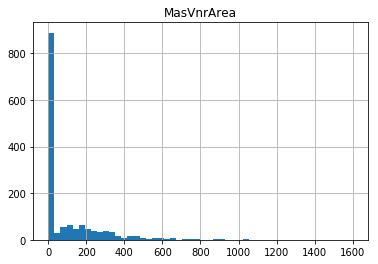

BsmtFinSF1
32.030178326474626% is zero


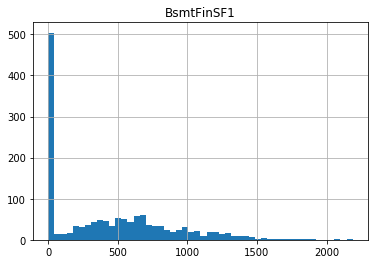

BsmtFinSF2
88.54595336076817% is zero


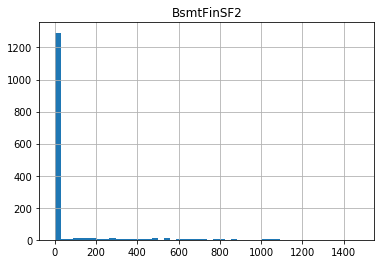

BsmtUnfSF
8.093278463648835% is zero


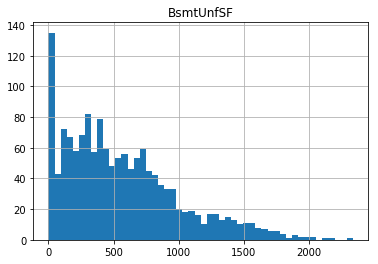

TotalBsmtSF
2.5377229080932784% is zero


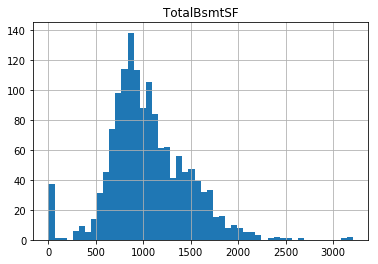

1stFlrSF
0.0% is zero


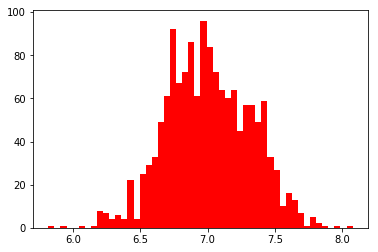

2ndFlrSF
56.85871056241426% is zero


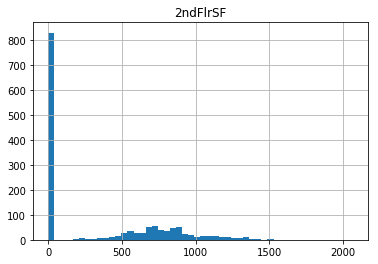

GrLivArea
0.0% is zero


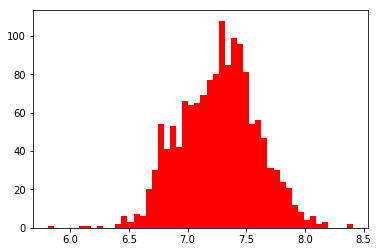

FullBath
0.6172839506172839% is zero


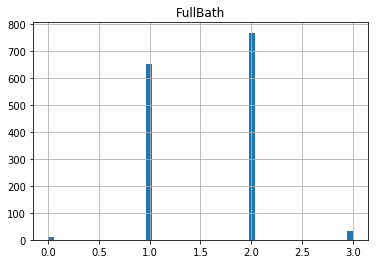

HalfBath
62.62002743484225% is zero


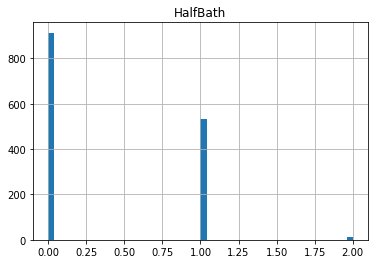

BedroomAbvGr
0.411522633744856% is zero


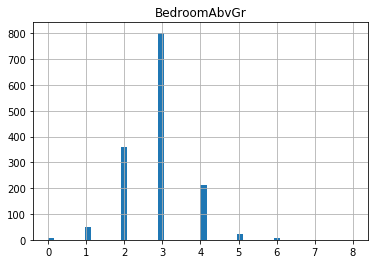

TotRmsAbvGrd
0.0% is zero


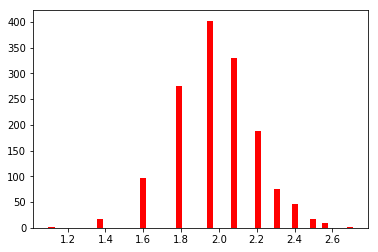

Fireplaces
47.325102880658434% is zero


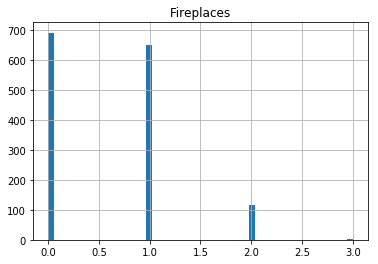

GarageYrBlt
0.0% is zero


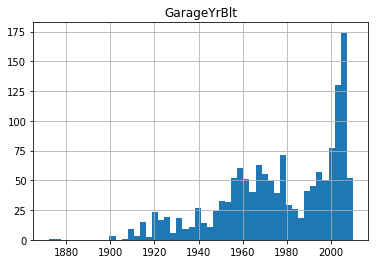

GarageCars
5.555555555555555% is zero


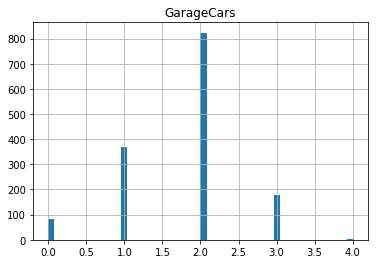

GarageArea
5.555555555555555% is zero


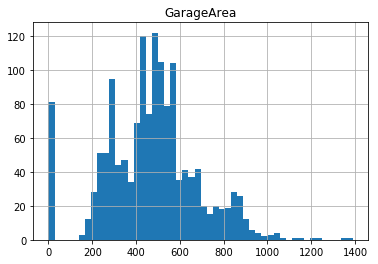

WoodDeckSF
52.19478737997256% is zero


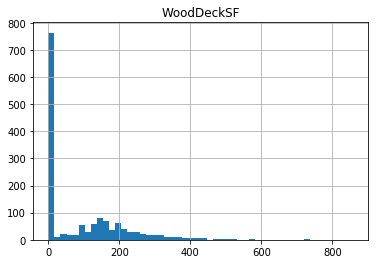

OpenPorchSF
44.99314128943759% is zero


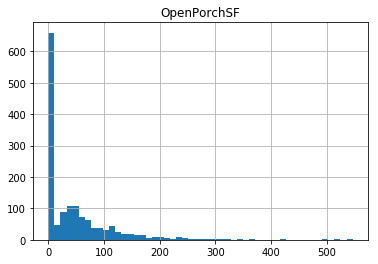

EnclosedPorch
85.73388203017832% is zero


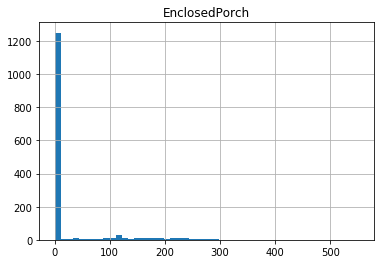

YrSold
0.0% is zero


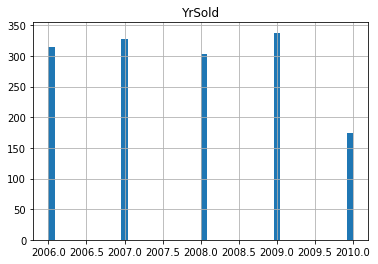

In [320]:
to_log = ["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea", "TotRmsAbvGrd"]
#print histogram of all the continuous variables
for header in headers_con:
    print(header)
    #get percentages of zero
    num_zero = np.count_nonzero(data[header] == 0)
    total = len(data[header])
    percent = (num_zero / total) * 100 
    print(str(percent) + "% is zero")
    if header in to_log:
        #make different color to differentiate
        plt.hist(np.log(data[header] + 1), bins=50, color="red")
    else:
        data.hist(column=header, bins=50)
    plt.show()
    
# #     plt.hist(np.log(data[header] + 1), bins=50)
# #     plt.show()
#     column = data[header]
#     column = (data[header] - np.min(data[header])) / (np.max(data[header]) - np.min(data[header]))
#     plt.hist(column, bins=50)
#     plt.show()

# data.hist(column="GrLivArea", bins=50)
# plt.show()

MSSubClass
36.762688614540465% is mode


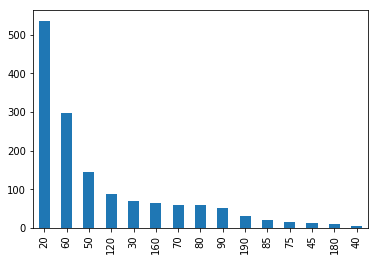

MSZoning
78.80658436213992% is mode


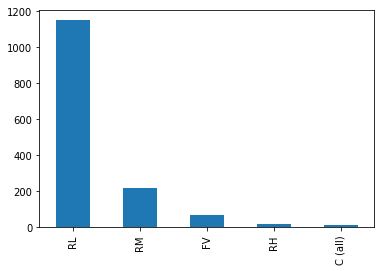

LotShape
63.44307270233196% is mode


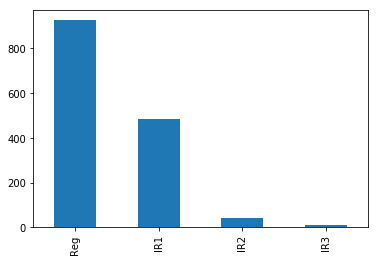

LandContour
89.91769547325103% is mode


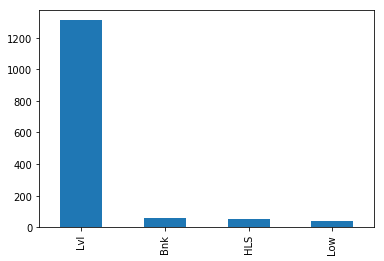

LotConfig
72.08504801097394% is mode


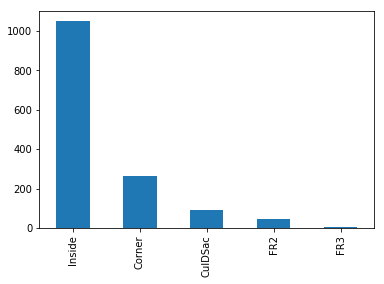

Neighborhood
15.432098765432098% is mode


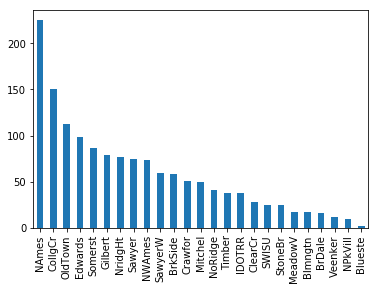

Condition1
86.41975308641975% is mode


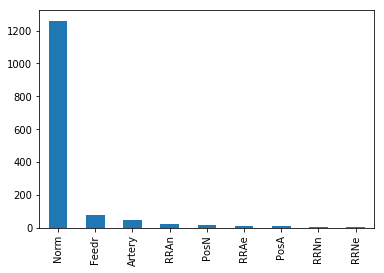

BldgType
83.53909465020575% is mode


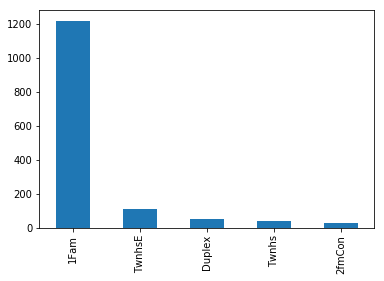

HouseStyle
49.794238683127574% is mode


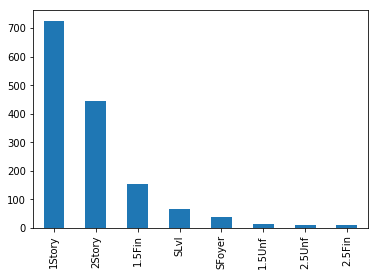

RoofStyle
78.25788751714677% is mode


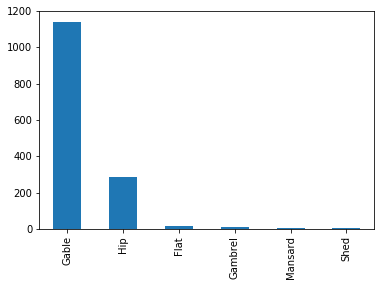

Exterior1st
35.32235939643347% is mode


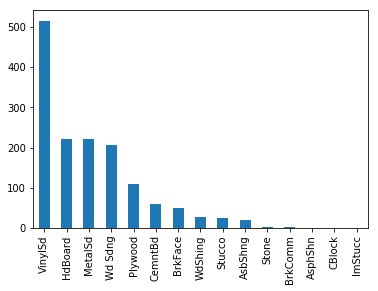

Exterior2nd
34.5679012345679% is mode


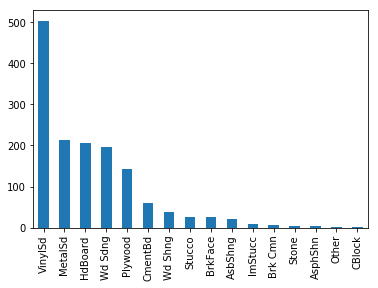

MasVnrType
59.807956104252405% is mode


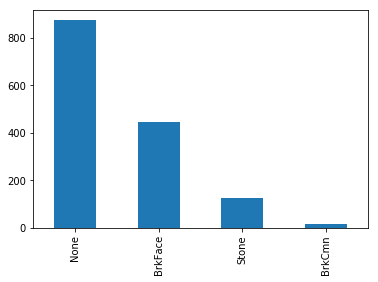

ExterQual
62.139917695473244% is mode


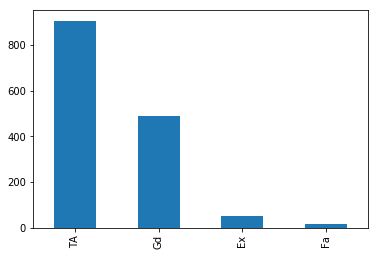

ExterCond
87.79149519890261% is mode


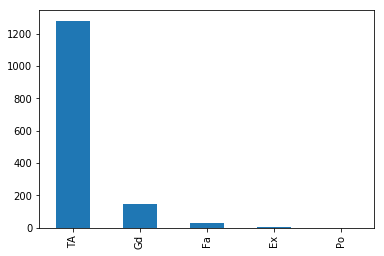

Foundation
44.23868312757202% is mode


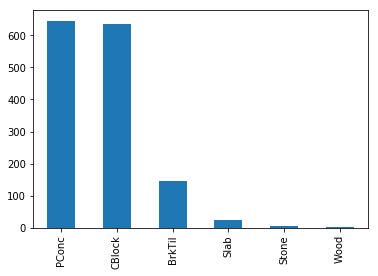

BsmtQual
44.51303155006859% is mode


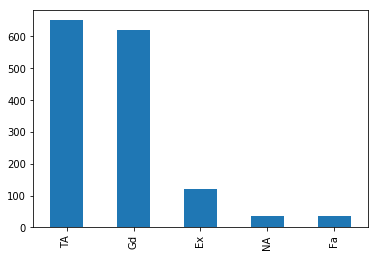

BsmtCond
89.78052126200275% is mode


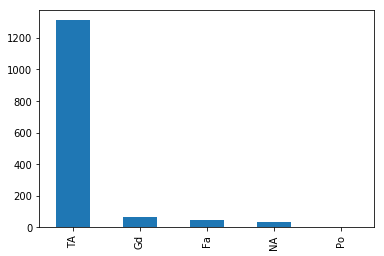

BsmtExposure
65.36351165980795% is mode


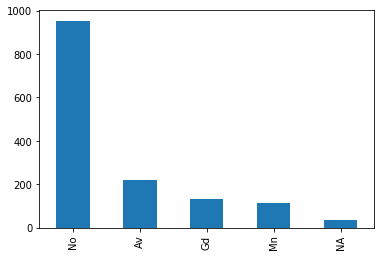

BsmtFinType1
29.492455418381347% is mode


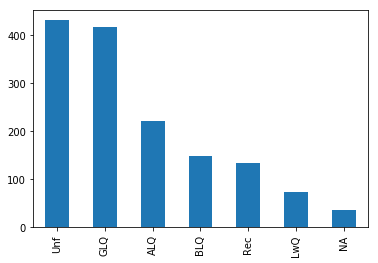

BsmtFinType2
86.0082304526749% is mode


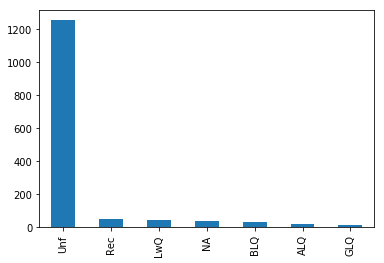

HeatingQC
50.685871056241425% is mode


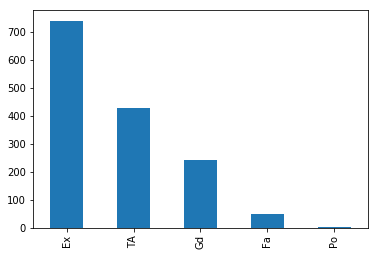

KitchenQual
50.41152263374485% is mode


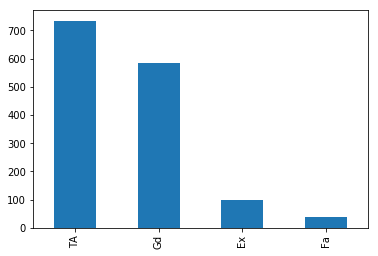

FireplaceQu
47.325102880658434% is mode


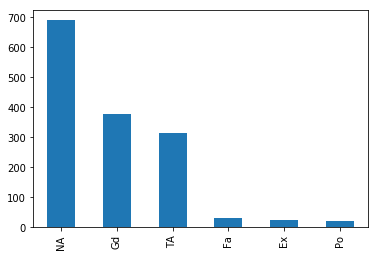

GarageType
59.60219478737997% is mode


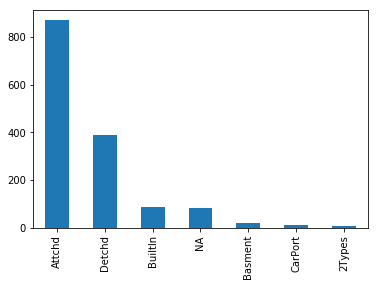

GarageFinish
41.49519890260631% is mode


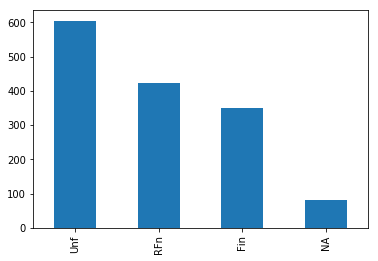

GarageQual
89.78052126200275% is mode


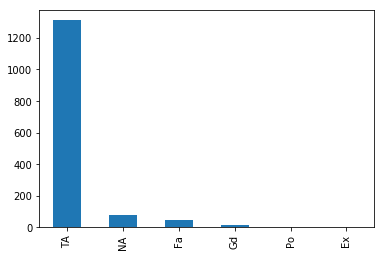

Fence
80.72702331961591% is mode


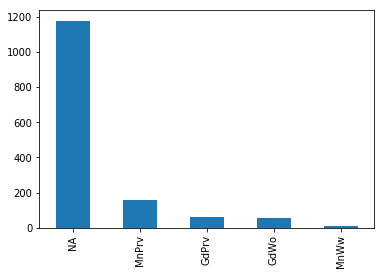

MoSold
17.352537722908092% is mode


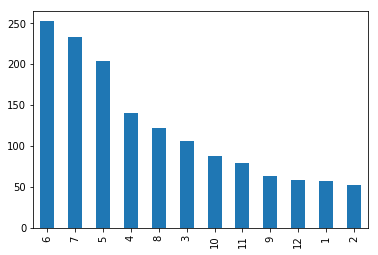

SaleType
86.89986282578876% is mode


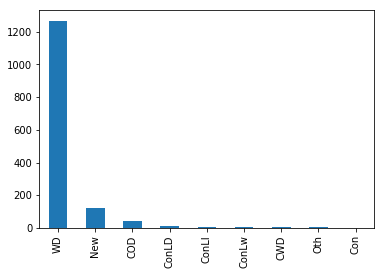

SaleCondition
82.1673525377229% is mode


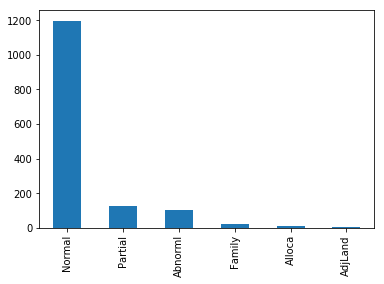

In [321]:
#print barchart for categorical headers
#for categorical, observe the mode
for header in headers_cat:
    print(header)
    mode = data[header].mode()[0]
    num_mode = np.count_nonzero(data[header] == mode)
    total = len(data[header])
    percent = (num_mode / total) * 100 
    print(str(percent) + "% is mode")
    data[header].value_counts().plot(kind='bar')
    plt.show()

In [322]:
#remove headers that have predominently one value (more than 90 percent)
#because the network will have trouble detecting its effect
to_combine_con = ["BsmtFullBath", "BsmtHalfBath"]
to_remove_con = ["LowQualFinSF", "KitchenAbvGr", "3SsnPorch", "ScreenPorch","PoolArea", "MiscVal"]
to_remove_cat = ["Street","Alley", "LandSlope", "Condition2", 
"RoofMatl", "Heating", "CentralAir", "Electrical", "Functional",
"GarageCond", "PavedDrive", "PoolQC", "MiscFeature"]

#make a new column for the elements in to_combined_con
data['BsmtTotalBath'] = data["BsmtFullBath"] + data["BsmtHalfBath"] * 0.5
data_test['BsmtTotalBath'] = data_test["BsmtFullBath"] + data_test["BsmtHalfBath"] * 0.5

#remove the columns in to_remove_con and to_remove_cat
data.drop(columns=to_remove_con,inplace=True)
data.drop(columns=to_remove_cat,inplace=True)
data.drop(columns=to_combine_con,inplace=True)
data_test.drop(columns=to_remove_con,inplace=True)
data_test.drop(columns=to_remove_cat,inplace=True)
data_test.drop(columns=to_combine_con,inplace=True)
print(data.shape)
print(data_test.shape)

(1458, 59)
(1459, 58)


In [323]:
#apply to log to features in to_log
for header in to_log:
    data[header] = np.log1p(data[header])
    data_test[header] = np.log1p(data_test[header])

#log saleprice separately
data["SalePrice"] = np.log1p(data["SalePrice"])
    
#perform factorization and ont-hot encoding for the categorical data
# for header in headers_cat:
#     data[header] = pd.factorize(data[header])[0]
#     data_test[header] = pd.factorize(data_test[header])[0]

df_con_train = data[headers_con]
df_con_test = data_test[headers_con]

#one-hot 
df_cat_train = data[headers_cat]
df_cat_test = data_test[headers_cat]

print(df_con_test.shape)
print(df_cat_test.shape)

for header in headers_cat:
    num_unique_train = data[header].nunique()  
    num_unique_test = data_test[header].nunique()
    uniq = data[header].unique()
    
    if num_unique_train == 2:
        #use label encoder
        le = preprocessing.LabelEncoder()
        df_cat_train[header] = le.fit_transform(df_cat_train[header])
        df_cat_test[header] = le.fit_transform(df_cat_test[header])
    else:
        #use get dummies
        df_cat_train = pd.concat([df_cat_train, pd.get_dummies(df_cat_train[header], prefix=header)], axis=1)
        df_cat_train.drop([header], axis=1, inplace=True)
        #use get dummies
        
        df_cat_test = pd.concat([df_cat_test, pd.get_dummies(df_cat_test[header], prefix=header).T.reindex(uniq).T.fillna(0)], axis=1)
        df_cat_test.drop([header], axis=1, inplace=True)
        
    
#split train data to train and val 
train_df_con, val_df_con, train_df_one_hot, val_df_one_hot, train_df_saleprice, val_df_saleprice = \
    train_test_split(df_con_train, df_cat_train, data["SalePrice"], test_size=0.10, random_state=42)

# print(train_df_con.shape)
# print(val_df_con.shape)
# print(train_df_one_hot.shape)
# print(val_df_one_hot.shape)

#standard scale matrix 
saleprice = train_df_saleprice.as_matrix() 
saleprice_val = val_df_saleprice.as_matrix()

#scale saleprice 
#reshape(-1,1) turns it from array to one column
scaler_sale = StandardScaler()
saleprice = scaler_sale.fit_transform(saleprice.reshape(-1,1)).flatten()
saleprice_val = scaler_sale.transform(saleprice_val.reshape(-1,1)).flatten() #only do fit_transform on train


#apply standardization and min-max. ensure min-max is between -1 and 1
not_log = [elem for elem in headers_con if not elem in to_log]
train_df_con_log = train_df_con[to_log]
train_df_con_not_log = train_df_con[not_log]

val_df_con_log = val_df_con[to_log]
val_df_con_not_log = val_df_con[not_log]

test_df_con_log = df_con_test[to_log]
test_df_con_not_log = df_con_test[not_log]

train_matrix_con_log = train_df_con_log.as_matrix()
val_matrix_con_log = val_df_con_log.as_matrix()
test_matrix_con_log = test_df_con_log.as_matrix()

train_matrix_con_not_log = train_df_con_not_log.as_matrix()
val_matrix_con_not_log = val_df_con_not_log.as_matrix()
test_matrix_con_not_log = test_df_con_not_log.as_matrix()

scaler = StandardScaler()
train_matrix_con_log = scaler.fit_transform(train_matrix_con_log) #only do fit_transform on train
val_matrix_con_log = scaler.transform(val_matrix_con_log)
test_matrix_con_log = scaler.transform(test_matrix_con_log)

scaler2 = MinMaxScaler(feature_range=(-1, 1))
train_matirx_con_not_log = scaler2.fit_transform(train_matrix_con_not_log)
val_matrix_con_not_log = scaler2.fit_transform(val_matrix_con_not_log)
test_matrix_con_not_log = scaler2.fit_transform(test_matrix_con_not_log)

#transform one hot dataframe to matrices
train_matrix_one_hot = train_df_one_hot.as_matrix()
val_matrix_one_hot = val_df_one_hot.as_matrix()
test_matrix_one_hot = df_cat_test.as_matrix()

#concatenate continuous with onehot
train_matrix_final = np.concatenate([train_matrix_con_log, train_matirx_con_not_log, train_matrix_one_hot], axis=1)
val_matrix_final = np.concatenate([val_matrix_con_log, val_matrix_con_not_log, val_matrix_one_hot], axis=1)
test_matrix_final = np.concatenate([test_matrix_con_log, test_matrix_con_not_log, test_matrix_one_hot], axis=1)

print(train_matrix_final.shape)
print(val_matrix_final.shape)
print(test_matrix_final.shape)



(1459, 26)
(1459, 31)
(1312, 255)
(146, 255)
(1459, 255)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:75: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:77: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:80:

In [324]:
#build the model with neural nets
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(255,))) 
model.add(Dropout(0.15))
model.add(Dense(800, activation='relu')) #expand
model.add(Dropout(0.15))
model.add(Dense(600, activation='relu')) #contract
model.add(Dropout(0.15))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='linear'))
model.summary() #print our our model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 600)               153600    
_________________________________________________________________
dropout_77 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 800)               480800    
_________________________________________________________________
dropout_78 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_79 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 300)               180300    
__________

In [325]:
#obtained function to calculate root mean squared logarithmic error from internet
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

#class that helps me see what my score will be on kaggle competition
class RSMLEMetric(keras.callbacks.Callback):

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1] #data given to network
        y_predict = np.asarray(model.predict(X_val))
        y_predict = np.exp(scaler_sale.inverse_transform(y_predict)) - 1 #converts from zscore to real price
        y_true = np.exp(scaler_sale.inverse_transform(y_val)) - 1
        
        print("RMSLE Error:", rmsle(y_true, y_predict))
    
#Compile the model
adamm = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None) # decay=0.0, amsgrad=False
model.compile(
  optimizer=adamm,
  loss='mse',
)

In [326]:
# Train the model.
model.fit(
  train_matrix_final,
  saleprice,
  epochs=200,
  batch_size=8,
  validation_data=(val_matrix_final, saleprice_val),
  shuffle = True,
  callbacks=[RSMLEMetric()]
)

Train on 1312 samples, validate on 146 samples
Epoch 1/200
1312/1312 [==============================] - 4s 3ms/step - loss: 0.8696 - val_loss: 0.6224
RMSLE Error: 0.3138709777663622
Epoch 2/200
1312/1312 [==============================] - 1s 1ms/step - loss: 0.4792 - val_loss: 0.2565
RMSLE Error: 0.20149851175567712
Epoch 3/200
1312/1312 [==============================] - 1s 995us/step - loss: 0.2572 - val_loss: 0.2094
RMSLE Error: 0.18205792592791312
Epoch 4/200
1312/1312 [==============================] - 1s 1ms/step - loss: 0.2206 - val_loss: 0.1992
RMSLE Error: 0.17755016426688247
Epoch 5/200
1312/1312 [==============================] - 1s 997us/step - loss: 0.2011 - val_loss: 0.1904
RMSLE Error: 0.1736157700886933
Epoch 6/200
1312/1312 [==============================] - 1s 1ms/step - loss: 0.1838 - val_loss: 0.1694
RMSLE Error: 0.16376129151158883
Epoch 7/200
1312/1312 [==============================] - 1s 999us/step - loss: 0.1667 - val_loss: 0.1626
RMSLE Error: 0.160449315222440

In [315]:
#new pandas dataframe to store results to submit
result = pd.DataFrame(columns=["Id","SalePrice"])
result["Id"] = test_id
salePrices = model.predict(test_matrix_final) #1459 x 1 dataframe
result["SalePrice"] = np.exp(scaler_sale.inverse_transform(salePrices)) - 1
#export to csv
result.to_csv("output.csv", index=False)